In [ ]:
!pip install --upgrade tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import keras
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report


In [ ]:
# Install the Kaggle library
!pip install kaggle

# Import the necessary libraries
import os
from google.colab import files

# Upload the kaggle.json file
uploaded = files.upload()

# Set up Kaggle API credentials
os.environ['KAGGLE_CONFIG_DIR'] = '/content/'

# Download the dataset
!kaggle datasets download -d mlg-ulb/creditcardfraud

# Unzip the dataset
!unzip creditcardfraud.zip

# Check the extracted files
!ls

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
data= pd.read_csv('creditcard.csv', delimiter = ";")
data

ParserError: ignored

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  int64  
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [ ]:
# checking the number of missing values in each column
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
#fixing time and amount
#time
from sklearn.preprocessing import RobustScaler
new_df = data.copy()
new_df['Amount'] = RobustScaler().fit_transform(new_df['Amount'].to_numpy().reshape(-1, 1))
time = new_df['Time']
new_df['Time'] = (time - time.min()) / (time.max() - time.min())
new_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000000,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,1.783274,0
1,0.000000,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.269825,0
2,0.000006,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.983721,0
3,0.000006,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.418291,0
4,0.000012,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.670579,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,0.999965,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.296653,0
284803,0.999971,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0.038986,0
284804,0.999977,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0.641096,0
284805,0.999977,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.167680,0


In [ ]:
#number of fraudulent and non fraudulent transaction
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [ ]:
new_df = new_df.sample(frac=1, random_state=1)
new_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
169876,0.693938,-0.611712,-0.769705,-0.149759,-0.224877,2.028577,-2.019887,0.292491,-0.523020,0.358468,...,-0.075208,0.045536,0.380739,0.023440,-2.220686,-0.201146,0.066501,0.221180,-0.282401,0
127467,0.453377,-0.814682,1.319219,1.329415,0.027273,-0.284871,-0.653985,0.321552,0.435975,-0.704298,...,-0.128619,-0.368565,0.090660,0.401147,-0.261034,0.080621,0.162427,0.059456,-0.279746,0
137900,0.476770,-0.318193,1.118618,0.969864,-0.127052,0.569563,-0.532484,0.706252,-0.064966,-0.463271,...,-0.305402,-0.774704,-0.123884,-0.495687,-0.018148,0.121679,0.249050,0.092516,-0.294977,0
21513,0.183556,-1.328271,1.018378,1.775426,-1.574193,-0.117696,-0.457733,0.681867,-0.031641,0.383872,...,-0.220815,-0.419013,-0.239197,0.009967,0.232829,0.814177,0.098797,-0.004273,-0.084119,0
134700,0.468326,1.276712,0.617120,-0.578014,0.879173,0.061706,-1.472002,0.373692,-0.287204,-0.084482,...,-0.160161,-0.430404,-0.076738,0.258708,0.552170,0.370701,-0.034255,0.041709,-0.296793,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21440,0.183261,-2.986845,-8.663978,-1.910863,0.664058,-3.934875,0.861269,1.647511,-0.480963,-1.546866,...,1.252092,-0.993085,-2.173147,0.145570,-0.235062,-0.227411,-0.382702,0.404045,32.002515,0
117583,0.432480,0.937083,-0.849673,0.524186,-0.020031,-0.606327,0.692302,-0.463724,0.148857,0.785062,...,-0.143322,-0.479981,-0.237902,-0.715247,0.251418,0.975406,-0.060168,0.023771,2.086495,0
73349,0.318852,-1.149963,1.696462,1.637114,2.658991,-0.021502,0.192287,0.205204,0.588754,-1.187820,...,0.025147,0.086506,-0.262748,0.321538,0.341667,0.210343,-0.162047,0.031193,-0.201495,0
267336,0.941757,1.754554,-0.699398,-0.076332,0.443915,-0.672082,0.389061,-0.807534,0.202915,0.858635,...,0.141950,0.358412,0.259748,0.746839,-0.560808,0.104636,-0.005853,-0.019622,1.017257,0


In [ ]:
x = new_df.drop(['Class'], axis=1)
y = new_df['Class']
y.value_counts()

0    284315
1       492
Name: Class, dtype: int64

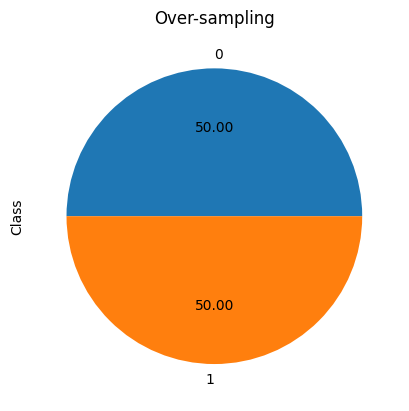

In [ ]:
from imblearn.over_sampling import RandomOverSampler

#ros = RandomOverSampler(sampling_strategy=1) # Float
ross = RandomOverSampler(sampling_strategy="not majority") # String
X_res1, y_res1 = ross.fit_resample(x, y)

ax = y_res1.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Over-sampling")

In [ ]:
y_res1.value_counts()

0    284315
1    284315
Name: Class, dtype: int64

In [ ]:
# Splitting the dataset using train test split
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_res1, y_res1, random_state=100, test_size=0.20)

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
model1=Sequential()
# first layer
model1.add(Dense(units=20,kernel_initializer='he_normal',activation='relu',input_dim=30))
#2nd layer
model1.add(Dense(units=15,kernel_initializer='he_normal',activation='relu'))
#3rd layer
model1.add(Dense(units=1,kernel_initializer='he_normal',activation='sigmoid'))
# compiling!
model1.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
# Train the ANN
model1.fit(X_train1, y_train1, batch_size = 32, epochs = 10,validation_split=0.2)

Epoch 1/10
11373/11373 [==============================] - 27s 2ms/step - loss: 0.0558 - accuracy: 0.9797 - val_loss: 0.0179 - val_accuracy: 0.9957
Epoch 2/10
11373/11373 [==============================] - 27s 2ms/step - loss: 0.0138 - accuracy: 0.9968 - val_loss: 0.0108 - val_accuracy: 0.9976
Epoch 3/10
11373/11373 [==============================] - 25s 2ms/step - loss: 0.0092 - accuracy: 0.9980 - val_loss: 0.0074 - val_accuracy: 0.9984
Epoch 4/10
11373/11373 [==============================] - 25s 2ms/step - loss: 0.0073 - accuracy: 0.9983 - val_loss: 0.0060 - val_accuracy: 0.9987
Epoch 5/10
11373/11373 [==============================] - 27s 2ms/step - loss: 0.0061 - accuracy: 0.9987 - val_loss: 0.0054 - val_accuracy: 0.9991
Epoch 6/10
11373/11373 [==============================] - 27s 2ms/step - loss: 0.0052 - accuracy: 0.9989 - val_loss: 0.0047 - val_accuracy: 0.9993
Epoch 7/10
11373/11373 [==============================] - 27s 2ms/step - loss: 0.0046 - accuracy: 0.9990 - val_loss: 0

In [ ]:
# extract the predicted probabilities
p_pred1 = model1.predict(X_test1)
p_pred1 = p_pred1.flatten()
print(p_pred1.round(2))

3554/3554 [==============================] - 5s 1ms/step
[1. 1. 1. ... 0. 0. 1.]


In [ ]:
# extract the predicted class labels
y_pred1 = np.where(p_pred1 > 0.5, 1, 0)
print(y_pred1)

[1 1 1 ... 0 0 1]


In [ ]:
print(confusion_matrix(y_test1, y_pred1))

[[56422   148]
 [    0 57156]]


In [ ]:
print(classification_report(y_test1, y_pred1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56570
           1       1.00      1.00      1.00     57156

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



tring to fix it

In [ ]:
# Print the values of true labels
print("True Labels:")
print(y_test1)

# Print the values of predicted labels
print("Predicted Labels:")
print(y_pred1)

# Check the shape of the arrays
print("Shape of true labels:", y_test1.shape)
print("Shape of predicted labels:", y_pred1.shape)

# Check the unique values in the arrays
print("Unique values in true labels:", np.unique(y_test1))
print("Unique values in predicted labels:", np.unique(y_pred1))

True Labels:
309550    1
418331    1
313225    1
354977    1
43690     0
         ..
481040    1
92883     0
269959    0
276875    0
497148    1
Name: Class, Length: 113726, dtype: int64
Predicted Labels:
[1 1 1 ... 0 0 1]
Shape of true labels: (113726,)
Shape of predicted labels: (113726,)
Unique values in true labels: [0 1]
Unique values in predicted labels: [0 1]


In [ ]:
# Predict probabilities and convert to class labels
p_pred1 = model1.predict(X_test1)
p_pred1 = p_pred1.flatten()
y_pred1 = np.where(p_pred1 > 0.5, 1, 0)

3554/3554 [==============================] - 4s 1ms/step


In [ ]:
# Generate classification report
print(classification_report(y_test1, y_pred1, labels=[0, 1]))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56570
           1       1.00      1.00      1.00     57156

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



same

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Load the dataset
data = pd.read_csv('creditcard.csv', delimiter=";")

# Preprocess the data
new_df = data.copy()
new_df['Amount'] = RobustScaler().fit_transform(new_df['Amount'].to_numpy().reshape(-1, 1))
time = new_df['Time']
new_df['Time'] = (time - time.min()) / (time.max() - time.min())

# Split the data into features (X) and target (y)
x = new_df.drop(['Class'], axis=1)
y = new_df['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=100, test_size=0.2)

# Perform oversampling on the training set only
ros = RandomOverSampler(sampling_strategy="not majority")
X_train_res, y_train_res = ros.fit_resample(X_train, y_train)

# Create the model
model = Sequential()
model.add(Dense(units=20, kernel_initializer='he_normal', activation='relu', input_dim=30))
model.add(Dense(units=15, kernel_initializer='he_normal', activation='relu'))
model.add(Dense(units=1, kernel_initializer='he_normal', activation='sigmoid'))
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_res, y_train_res, batch_size=32, epochs=10, validation_split=0.2)

# Evaluate the model on the testing set
y_pred = model.predict(X_test)
y_pred = np.where(y_pred > 0.5, 1, 0)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Epoch 1/10
11373/11373 [==============================] - 27s 2ms/step - loss: 0.0423 - accuracy: 0.9854 - val_loss: 0.0109 - val_accuracy: 1.0000
Epoch 2/10
11373/11373 [==============================] - 35s 3ms/step - loss: 0.0087 - accuracy: 0.9981 - val_loss: 0.0037 - val_accuracy: 1.0000
Epoch 3/10
11373/11373 [==============================] - 27s 2ms/step - loss: 0.0057 - accuracy: 0.9988 - val_loss: 0.0018 - val_accuracy: 1.0000
Epoch 4/10
11373/11373 [==============================] - 27s 2ms/step - loss: 0.0049 - accuracy: 0.9989 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 5/10
11373/11373 [==============================] - 26s 2ms/step - loss: 0.0042 - accuracy: 0.9991 - val_loss: 0.0026 - val_accuracy: 1.0000
Epoch 6/10
11373/11373 [==============================] - 27s 2ms/step - loss: 0.0036 - accuracy: 0.9992 - val_loss: 0.0040 - val_accuracy: 1.0000
Epoch 7/10
11373/11373 [==============================] - 27s 2ms/step - loss: 0.0031 - accuracy: 0.9993 - val_loss: 0